活性化関数の出力
 $$ \phi(w^Tx)=w^Tx$$

重さの計算
$$ \Delta w_j = (学習率)\Sigma_i(y^{(i)}-\phi(w^Tx))x_j^{(i)} $$
勾配降下法を使う
　コスト関数J(w)を定義し、コスト関数を最小化するようにする
 

## 実装

In [10]:
"""ADAptive Linear Neuron分類器
    
パラメータ
-------------------------------
eta:float
    学習率（0.0より大きく1.0以下の値）
n_iter:int
    トレーニングデータのトレーニング回数
        
属性
------------------------------
w_:一次元配列
    適応後の重み
errors_:リスト
    各エポックでの誤分類数
"""
class AdalineGD(object):

    def __init__(self,eta=0.01,n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    """トレーニングデータに適合させる
    
    パラメータ
    ------------------------------
    X:{配列のようなデータ構造},shape=[n_samples,n_features]トレーニングデータ
        n_samples:サンプルの個数
        n_features:特徴量の個数
    y:配列のようなデータ構造.shape= [n_samples]
        目的関数
    戻り値
    -----------------------------
    self:object
    """
    def fit(self,X,y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
    
        #トレーニング回数分トレーニングデータを反復
        for i in range(self.n_iter):
            #活性化関数の出力の計算 φ(wx) = wx
            output = self.net_input(X)
                
            #誤差（正解値と予測値の差）を計算
            errors = y - output
            #重みの更新
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            #コスト関数を計算
            cost = (errors**2).sum() / 2.0
            #コストの格納
            self.cost_.append(cost)
        return self
    
    """総入力を計算"""
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    """線形活性化関数の出力を計算"""
    def activation(self,X):
        return self.net_input(X)
    
    """1ステップ後のクラスラベルを返す"""
    def predict(self,X):
        return np.where(self.activation(X) > 0.0,1,-1)

In [11]:
#学習データの設定
import numpy as np
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
#irisのデータから正解値（dfの4列目）を取り出す
y = df.iloc[0:100,4].values
#iris-setosaを-1,Iris-virginicaを1に変換
y = np.where(y=='Iris-setosa',-1,1)
#Irisのデータから0行目と2行目をデータとして抽出
X = df.iloc[0:100,[0,2]].values

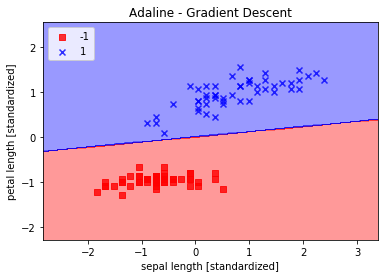

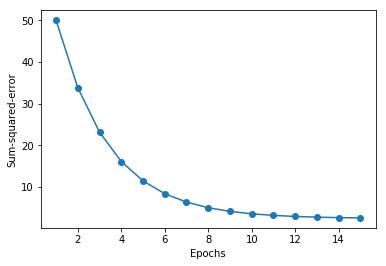

In [24]:

#勾配降下法によるADALINEの学習（標準化後、学習率eta=0.01）
ada = AdalineGD(n_iter=15,eta=0.01)
#モデルの適合
ada.fit(X_std,y)
#境界領域のプロット
plot_decision_regions(X_std,y,classifier=ada)

#タイトルの設定
plt.title('Adaline - Gradient Descent')
#軸のラベルの設定
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')

#凡例の設定（左上の設定）
plt.legend(loc='upper left')

#図の表示
plt.show()

#エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1,len(ada.cost_) + 1),ada.cost_,marker='o')
#軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

#図の表示
plt.show()

### データのスケーリング（標準化）

機械学習の様々なアルゴリズムは、特徴量のスケーリングをすることでパフォーマンスが実現される<br>
今回は標準化を行う

In [13]:
#データのコピー
X_std = np.copy(X)
#各列の標準化
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

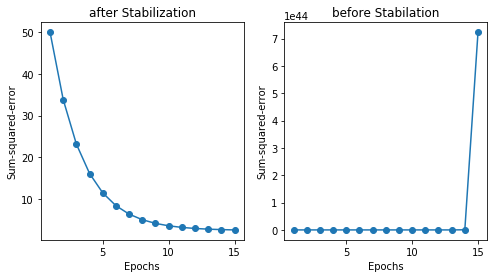

In [25]:

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
#勾配降下法によるADALINEの学習（標準化後、学習率eta=0.01）
ada = AdalineGD(n_iter=15,eta=0.01)
#モデルの適合
ada.fit(X_std,y)
#境界領域のプロット
#タイトルの設定
ax[0].set_title('after Stabilization')
#軸のラベルの設定
#エポック数とコストの関係を表す折れ線グラフのプロット
ax[0].plot(range(1,len(ada.cost_) + 1),ada.cost_,marker='o')
#軸のラベルの設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')

#勾配降下法によるADALINEの学習（標準化前、学習率eta=0.01）
ada1 = AdalineGD(n_iter=15,eta=0.01).fit(X,y)
#境界領域のプロット

#タイトルの設定
ax[1].set_title('before Stabilation')
#軸のラベルの設定
#エポック数とコストの関係を表す折れ線グラフのプロット
ax[1].plot(range(1,len(ada1.cost_) + 1),ada1.cost_,marker='o')
#軸のラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')

#図の表示
plt.show()

### 学習率

ADALineが学習率がハイパーパラメータとなっている。 <br>
例えば、学習率が大きい場合（下の0.01）の場合はエラー率が上昇している <br>
また学習率が小さい場合（下の0.0001）の場合、収束するには相当な数のエポック数が必要
それをグラフ化すると図2-12のようになる

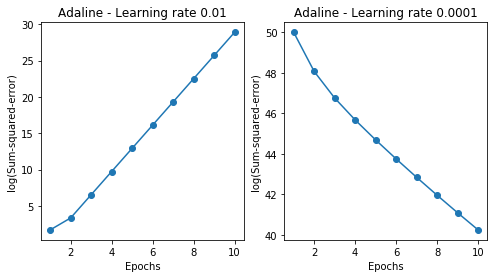

In [15]:
import matplotlib.pyplot as plt
#描写領域を1行2列に分割
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))

#勾配降下法によるADALINEの学習（学習率eta=0.01）
ada1 = AdalineGD(n_iter=10,eta=0.01).fit(X,y)
#エポック数とコストの関係を表す折れ線グラフのプロット（縦軸のコストは常用対数）
ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_),marker='o')
#軸のラベルの設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
#タイトルの設定
ax[0].set_title('Adaline - Learning rate 0.01')

#勾配降下法によるADALINEの学習（学習率 eta=0.0001）
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_,marker='o')
#軸のラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
#タイトルの設定
ax[1].set_title('Adaline - Learning rate 0.0001')
#図の表示
plt.show()


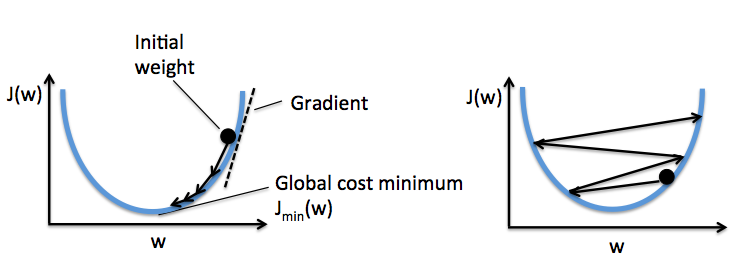

In [23]:
from IPython.display import Image
Image(filename='./images/02_12.png', width=700) 

### バッチ降下法と確率的降下法

バッチ降下法では、トレーニングデータセット全体から勾配を求める
確率的降下法は、トレーニングサンプルごとに段階的に重みを更新する
$$ \Delta w_j = (学習率)(y^{(i)}-\phi(w^Tx))x_j^{(i)} $$
これにより通常よりはやく収束しかつオンライン学習に使える


In [17]:
#確率的降下法のAdalineの実装
from numpy.random import seed

"""ADAptive Liner Neuron分類器

"""
class AdalineSGD(object):
    """
パラメータ
------------------------------
eta:float
    学習率（0.0より大きく1.0以下の値）
n_iter:int
    トレーニングデータのトレーニング数
属性
------------------------------
w_:一次元配列
    適合後の重み
error_:リスト　各エポックでの誤分類数
shuffle:bool(デフォルト;True)
    循環を回避するために各エポックでトレーニングデータをシャッフル
random_state:int(デフォルト:None)
    シャッフルに使用するランダムステートを設定し重みを初期化
    """
    def __init__(self,eta=0.01,n_iter=10,shuffle=True,random_state=None):
        #学習率の初期化
        self.eta = eta
        #トレーニング回数の初期化
        self.n_iter = n_iter
        #重みの初期化フラグはFalseに設定
        self.w_initialized = False
        #各エポックでトレーニングデータをシャッフルするかどうかのフラグを初期化
        self.shuffle = shuffle
        
        #引数random_stateが指定されていた場合は乱数種を設定
        if random_state:
            seed(random_state)
    
    """トレーニングデータに適合させる
    パラメータ
    -------------------------------------
    X:{配列のような}データ構造},shape = [n_samples,n_features]　トレーニングデータ
        n_samplesはサンプルの個数
        n_featuresは特徴量の個数
    Y:配列のようなデータ構造,shape=[n_samples] 目的関数
    
    戻り値
    -------------------------------------
    self:object
    """
    def fit(self,X,y):
        #重みベクトルの生成
        self._initialize_weights(X.shape[1])
        #コストを格納するリストの生成
        self.cost_ = []
        #トレーニング回数分トレーニングデータを反復
        for i in range(self.n_iter):
            #指定された場合はトレーニングデータをシャッフル
            if self.shuffle:
                X,y = self._shuffle(X,y)
            #各サンプルのコストを格納するリストの生成
            cost = []
            #各サンプルに対する計算
            for xi,target in zip(X,y):
                #特徴量xiと目的変数yを用いた重みの更新とコストの計算
                cost.append(self._update_weights(xi,target))
            #サンプルの平均コストの計算
            avg_cost = sum(cost)/len(y)
            #平均コストを格納
            self.cost_.append(avg_cost)
        return self
    
    """重みを再初期化することなくトレーニングデータに適合させる"""
    def partial_fit(self,X,y):
        #初期化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        #目的変数yの要素数が2以上の場合は
        #各サンプルの特徴量xiと目的関数targetで重みを更新
        if y.ravel().shape[0] > 1:
            for xi,target in zip(X,y):
                self._update_weights(xi,target)
        #目的変数yの要素数が1の場合は
        #サンプル全体の特徴量Xと目的変数yで重みを更新
        else:
            self._update_weights(X,y)
        return self
    
    """トレーニングデータをシャッフル"""
    def _shuffle(self,X,y):
        r = np.random.permutation(len(y))
        return X[r],y[r]
    
    """重みを0に初期化"""
    def _initialize_weights(self,m):
        self.w_ = np.zeros(1+m)
        self.w_initialized = True
        
    """ADALINEの学習規則を用いて重みを更新"""
    def _update_weights(self,xi,target):
        #活性化関数の出力の計算
        output = self.net_input(xi)
        #誤差の計算
        error = target - output
        #重みの更新
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        
        #コストの計算
        cost = 0.5 * error ** 2
        return cost
    
    """総入力を計算"""
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    """線形活性化関数の出力を計算"""
    def activation(self,X):
        return self.net_input(X)
    
    """1ステップ後のクラスラベルを返す"""
    def predict(self,X):
        return np.where(self.activation(X) > 0.0,1,-1)

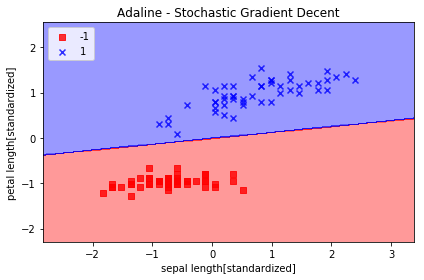

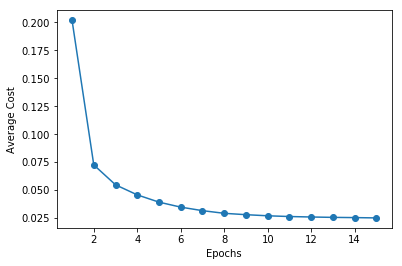

In [18]:
#確率勾配降下法によるADALINEの学習
ada = AdalineSGD(n_iter=15,eta=0.01,random_state=1)
#モデルの適応
ada.fit(X_std,y)
#境界領域のプロット
plot_decision_regions(X_std,y,classifier=ada)
#タイトルの設定
plt.title('Adaline - Stochastic Gradient Decent')
#軸ラベルの設定
plt.xlabel('sepal length[standardized]')
plt.ylabel('petal length[standardized]')

#凡例の設定（左上に設定）
plt.legend(loc='upper left')
plt.tight_layout()
#プロットの表示
plt.show()
#エポック数とコストの折れ線グラフのプロット
plt.plot(range(1,len(ada.cost_) + 1 ),ada.cost_,marker='o')
#軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.show()

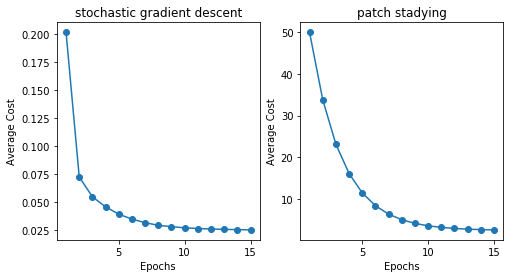

In [19]:
#バッチ学習と確率敵勾配降下法とを比較
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
ada = AdalineSGD(n_iter=15,eta=0.01,random_state=1)
#モデルの適応
ada.fit(X_std,y)

ada1 = AdalineGD(n_iter=15,eta=0.01).fit(X_std,y)

#タイトルの設定
ax[0].set_title('stochastic gradient descent')
#エポック数とコストの折れ線グラフのプロット
ax[0].plot(range(1,len(ada.cost_) + 1 ),ada.cost_,marker='o')
#軸のラベルの設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Average Cost')

#タイトルの設定
ax[1].set_title('patch stadying')
#エポック数とコストの折れ線グラフのプロット
ax[1].plot(range(1,len(ada1.cost_) + 1 ),ada1.cost_,marker='o')
#軸のラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Average Cost')

plt.show()

### 図を表示するための関数

In [20]:
### データの可視化する関数
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    #マーカーとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域をプロット
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    
    #グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),\
                         np.arange(x2_min,x2_max,resolution))
    
    #各特徴量を1智元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    #グリッドポイントの等高線をプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    #軸の範囲の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルをプロット
    #enumerateはindexを返す
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl,1],alpha=0.8,\
                   c=cmap(idx),marker=markers[idx],label=cl)
